In [1]:
#importer les bibliothèges
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datapfe.xlsx")
data.columns = ["area","room","city","year","efficiency_class","Category","model","basement","fitted_kitchen","terrasse","equipment","price"]
data.drop(data.index[data['room'] == 'k.A.'], inplace=True)
data.drop(data.index[data['Category'] == 'Gewerbeflächen'], inplace=True)



data.loc[data["model"].str.contains('Neubau') | data["model"].str.contains('renoviert') | data["model"].str.contains('gehoben')  | data["model"].str.contains('Erstbezug'), "model"] = "new"
data.loc[data["model"].str.contains('renovierungsbedürftig') | data["model"].str.contains('sanierungsbedürftig') | data["model"].str.contains('entkernt') | data["model"].str.contains('Altbau') | data["model"].str.contains('baufällig'), "model"] = "old"
data.loc[data["model"].str.contains('gepflegt') | data["model"].str.contains('saniert') | data["model"].str.contains('projektiert') | data["model"].str.contains('teilsaniert'), "model"] = "middle"

data.loc[data["Category"].str.contains('Doppelhaus') | data["Category"].str.contains('Doppelhaus') | data["Category"].str.contains('Bauernhaus'), "Category"] = "Doppelhaushälfte"
for i in range(len(data["model"])):
  data.iloc[i,1]=float(str(data.iloc[i,1]).replace(",", "."))
data['room'] = data['room'].astype(float)
print(data.dtypes)

area                float64
room                float64
city                 object
year                float64
efficiency_class     object
Category             object
model                object
basement            float64
fitted_kitchen      float64
terrasse            float64
equipment           float64
price               float64
dtype: object


In [4]:
data=pd.get_dummies(data)
data=data.iloc[:-1, :]
data

,area,room,year,basement,fitted_kitchen,terrasse,equipment,price,city_aachen,city_augsburg,...,Category_Einfamilienhaus,Category_Mehrfamilienhaus,Category_Reihenendhaus,Category_Reihenmittelhaus,Category_Stadthaus,Category_Villa,Category_Zweifamilienhaus,model_middle,model_new,model_old
1,111.0,5.0,1912.0,1.0,1.0,1.0,1.0,695000.0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,85.0,4.0,1958.0,1.0,0.0,1.0,1.0,995000.0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,118.0,4.0,1981.0,0.0,0.0,0.0,0.0,649000.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,80.0,4.0,1937.0,1.0,0.0,1.0,0.0,520000.0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,120.0,3.0,1985.0,0.0,1.0,0.0,0.0,990000.0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,100.0,4.0,1985.0,0.0,1.0,1.0,1.0,459000.0,0,0,...,0,0,1,0,0,0,0,1,0,0
751,167.0,7.0,1968.0,0.0,0.0,0.0,0.0,589000.0,0,0,...,0,1,0,0,0,0,0,1,0,0
752,80.0,5.0,1949.0,1.0,1.0,1.0,1.0,279000.0,0,0,...,0,0,0,1,0,0,0,1,0,0
753,428.0,13.0,1902.0,0.0,0.0,0.0,1.0,1428500.0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [5]:
from sklearn.model_selection import train_test_split
X = data.loc[:, data.columns != 'price'] # les caractéristiques
y = data.iloc[:,7] # les résultats (classes)
y.head()


1    695000.0
2    995000.0
3    649000.0
4    520000.0
5    990000.0
Name: price, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)


In [7]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X, y) 

regressor.score(X,y)

0.9453798537725931

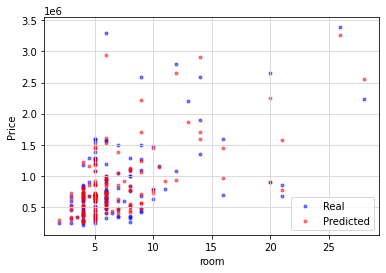

In [11]:
# Make prediction
predictions = regressor.predict(X_test)
# Import library for visualization
import matplotlib.pyplot as plt

# Define x axis
x_axis = X_test.room

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('room')
plt.ylabel('Price')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

In [12]:
# Get features list
characteristics = X.columns

In [13]:
# Get the variables importances, sort them, and print the result
importances = list(regressor.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];

Variable: area                 Importance: 0.54
Variable: year                 Importance: 0.08
Variable: city_muenchen        Importance: 0.06
Variable: room                 Importance: 0.05
Variable: city_berlin          Importance: 0.02
Variable: city_hamburg         Importance: 0.02
Variable: efficiency_class_F   Importance: 0.02
Variable: basement             Importance: 0.01
Variable: fitted_kitchen       Importance: 0.01
Variable: terrasse             Importance: 0.01
Variable: equipment            Importance: 0.01
Variable: city_bremen          Importance: 0.01
Variable: city_duesseldorf     Importance: 0.01
Variable: city_essen           Importance: 0.01
Variable: city_frankfurt-am-main Importance: 0.01
Variable: efficiency_class_B   Importance: 0.01
Variable: efficiency_class_D   Importance: 0.01
Variable: Category_Einfamilienhaus Importance: 0.01
Variable: Category_Mehrfamilienhaus Importance: 0.01
Variable: Category_Stadthaus   Importance: 0.01
Variable: Category_Villa     

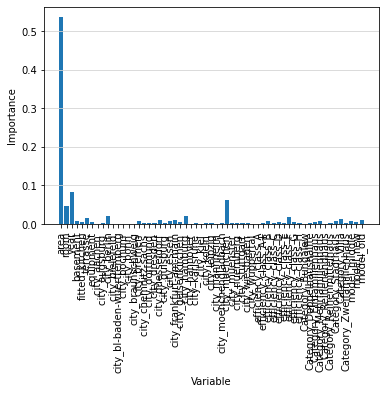

In [14]:
# Visualize the variables importances
plt.bar(characteristics, importances, orientation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.grid(axis = 'y', color = '#D3D3D3', linestyle = 'solid')
plt.show()